In [1]:
import numpy as np
import yfinance as yf 
import pandas as pd
from scipy.optimize import brute
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set up the ticker
ticker_symbol = "META"
start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
SMA1 = 14
SMA2 = 50

# Fetch the data
stock_data = yf.download(ticker_symbol,start=start_date, end=end_date)
stock_data.tail(6)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-17,293.049988,296.049988,284.950012,285.089996,285.089996,23950100
2023-08-18,279.029999,285.690002,274.380005,283.250000,283.250000,34061200
2023-08-21,283.450012,290.500000,281.850006,289.899994,289.899994,20181500
2023-08-22,292.549988,292.899994,286.750000,287.600006,287.600006,12999900
2023-08-23,288.500000,297.399994,287.670013,294.239990,294.239990,18182400
2023-08-24,298.500000,299.459991,287.320099,290.559998,290.559998,8471485


In [6]:
# Generate the strategy testing data framework
df = stock_data[['Close']]
df["return"] = np.log(df / df.shift(1))
df['SMA1'] = df["Close"].rolling(SMA1).mean()
df['SMA2'] = df["Close"].rolling(SMA2).mean()
df.tail(9)

C:\Users\Yichao Hou\AppData\Local\Temp\ipykernel_23868\909942687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["return"] = np.log(df / df.shift(1))
C:\Users\Yichao Hou\AppData\Local\Temp\ipykernel_23868\909942687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA1'] = df["Close"].rolling(SMA1).mean()
C:\Users\Yichao Hou\AppData\Local\Temp\ipykernel_23868\909942687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Close,return,SMA1,SMA2
Date,,,,
2023-08-14,306.190002,0.014972,311.662859,294.348800
2023-08-15,301.950012,-0.013944,311.904288,294.935601
2023-08-16,294.290009,-0.025696,310.660004,295.393600
2023-08-17,285.089996,-0.031761,307.775003,295.673000
2023-08-18,283.250000,-0.006475,305.250002,296.066000
2023-08-21,289.899994,0.023206,302.906431,296.572401
2023-08-22,287.600006,-0.007965,300.998574,297.025400
2023-08-23,294.239990,0.022825,299.645002,297.489200
2023-08-24,290.559998,-0.012586,298.204287,297.874000


In [10]:
# Run strategy
data = df.copy().dropna()
data['position'] = np.where(data['SMA1']>data['SMA2'],1,-1)
data['strategy'] = data['position'].shift(1) * data['return']
data.dropna(inplace=True)
data['creturns'] = data['return'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
data.tail()

,Close,return,SMA1,SMA2,position,strategy,creturns,cstrategy
Date,,,,,,,,
2023-08-18,283.250000,-0.006475,305.250002,296.066000,1,-0.006475,12.235421,14.970875
2023-08-21,289.899994,0.023206,302.906431,296.572401,1,0.023206,12.522678,15.322353
2023-08-22,287.600006,-0.007965,300.998574,297.025400,1,-0.007965,12.423327,15.200790
2023-08-23,294.239990,0.022825,299.645002,297.489200,1,0.022825,12.710151,15.551739
2023-08-24,290.559998,-0.012586,298.204287,297.874000,1,-0.012586,12.551188,15.357237


<Axes: title={'center': 'META | SMA1=14, SMA2=50'}, xlabel='Date'>

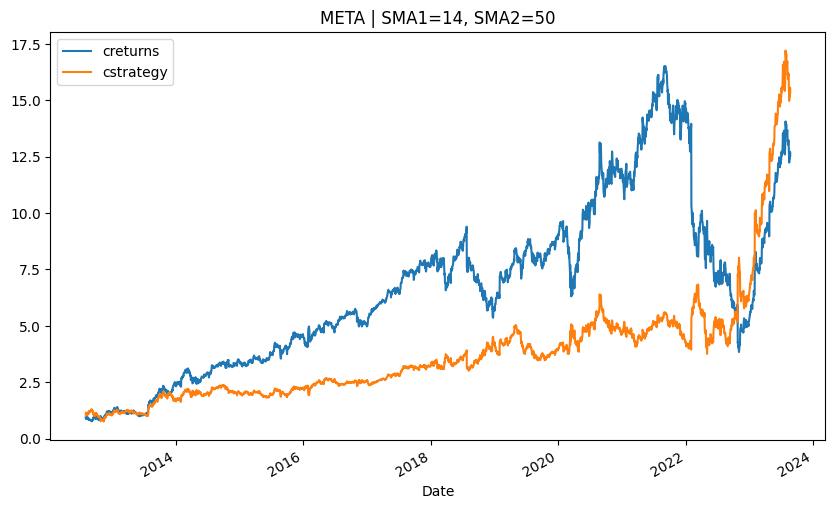

In [11]:
# Plot Strategy Results
title = '%s | SMA1=%d, SMA2=%d' % (ticker_symbol, SMA1, SMA2)
data[['creturns', 'cstrategy']].plot(title=title, figsize=(10, 6))

In [ ]:
# Optimize parameters
